# Importando a base de dados

In [26]:
import pandas as pd

In [27]:
gorjetas = pd.read_csv('dados/tips.csv')

In [28]:
gorjetas.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo a base de dados

In [29]:
gorjetas.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [30]:
renomear = {
    'total_bill': 'valor_conta', 
    'tip': 'valor_gorjeta', 
    'dessert': 'sobremesa', 
    'day': 'dia_semana', 
    'time': 'refeicao', 
    'size': 'quantidade_pessoas'
}

In [31]:
gorjetas = gorjetas.rename(columns = renomear)

In [33]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [34]:
sim_nao = {
    'No': 'Não', 
    'Yes': 'Sim'
}

In [35]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [37]:
gorjetas.dia_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [38]:
dias = {
    'Sun': 'Domingo', 
    'Sat': 'Sábado',
    'Thur': 'Quinta-feira',
    'Fri': 'Sexta-feira'
}

In [39]:
gorjetas.dia_semana = gorjetas.dia_semana.map(dias)

In [42]:
gorjetas.refeicao.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [44]:
horas = {
    'Dinner': 'Jantar', 
    'Lunch': 'Almoço'
}

In [45]:
gorjetas.refeicao = gorjetas.refeicao.map(horas)

In [47]:
gorjetas.head()

,valor_conta,valor_gorjeta,sobremesa,dia_semana,refeicao,quantidade_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando o Seaborn

In [49]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 208 kB 2.1 MB/s 
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2


In [54]:
import seaborn as sns

# Analisando valor da conta e gorjeta

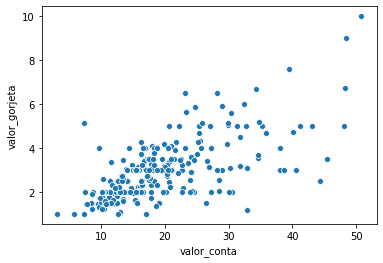

In [57]:
conta_gorjeta = sns.scatterplot(x='valor_conta', y='valor_gorjeta', data=gorjetas)

**Aparentemente, o valor da gorjeta aumenta conforme aumenta o valor da conta.**

In [63]:
print('A base de dados contém {} registros.\n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros.

Registros não nulos:


valor_conta           244
valor_gorjeta         244
sobremesa             244
dia_semana            244
refeicao              244
quantidade_pessoas    244
dtype: int64

## Criando o campo percentagem

In [72]:
gorjetas['porcentagem'] = (gorjetas['valor_gorjeta']/gorjetas['valor_conta']).round(3)

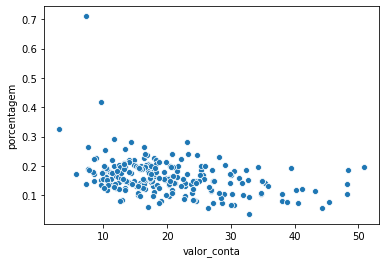

In [74]:
porcentagem_conta = sns.scatterplot(x='valor_conta', y='porcentagem', data=gorjetas)

**Porém, aqui percebemos que na realidade o valor da conta não é proporcional ao valor da gorjeta, visto que o valor da conta aumenta e a porcentagem dada como gorjeta diminui.**

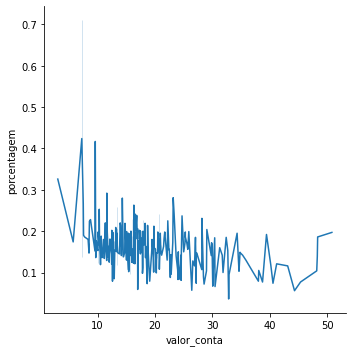

In [77]:
porcentagem_conta_linha = sns.relplot(x='valor_conta', y='porcentagem', kind='line', data=gorjetas)

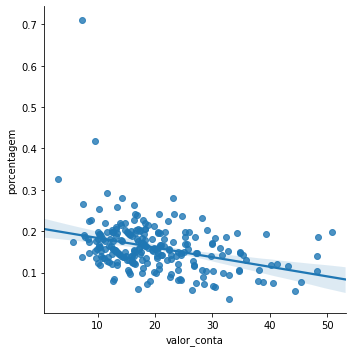

In [93]:
porcentagem_conta_lmplot = sns.lmplot(x='valor_conta', y='porcentagem', data=gorjetas)

In [95]:
porcentagem_conta_lmplot

In [96]:
porcentagem_conta_lmplot.get_figure()

AttributeError: ignored

**Neste gráfico é mais visível que a porcentagem cedida de gorjeta fica menor a medida que o valor da conta aumenta.**